Use this notebook to introduce services to one another, so that they can trust each other

In [1]:
from Acquire.Client import User, Service, Authorisation

In [2]:
url = "http://fn.acquire-aaai.com:8080/t"

In [3]:
identity_service = Service(service_url="%s/identity" % url)
print(identity_service)

IdentityService(url=http://fn.acquire-aaai.com:8080/t/identity, uid=fdac3ab5-3527-46f8-8432-c7ec8f586fc6)


http://fn.acquire-aaai.com:8080/t/identity/s?id=d1d74676


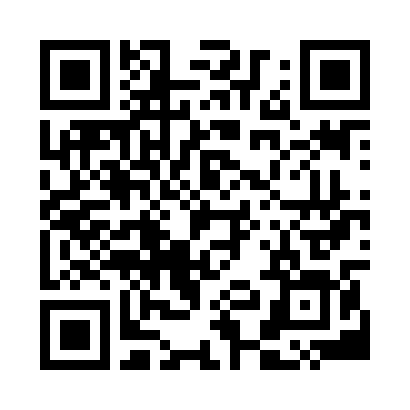

In [4]:
admin_identity = User("admin-%s" % identity_service.service_type(), identity_url=identity_service.canonical_url())
(login_url, qrcode) = admin_identity.request_login()
print(login_url)
qrcode

In [5]:
admin_identity.wait_for_login()

True

In [6]:
accounting_service = Service(service_url="%s/accounting" % url)
print(accounting_service)

AccountingService(url=http://fn.acquire-aaai.com:8080/t/accounting, uid=ee005e09-c312-44be-bcce-08ac158a1234)


http://fn.acquire-aaai.com:8080/t/accounting/s?id=0946b5ef


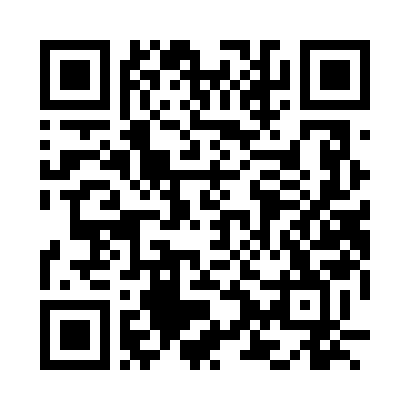

In [7]:
admin_accounting = User("admin-%s" % accounting_service.service_type(), identity_url=accounting_service.canonical_url())
(login_url, qrcode) = admin_accounting.request_login()
print(login_url)
qrcode

In [8]:
admin_accounting.wait_for_login()

True

In [9]:
access_service = Service(service_url="%s/access" % url)
print(access_service)

AccessService(url=http://fn.acquire-aaai.com:8080/t/access, uid=ab495477-5781-45f3-baef-1a17f62d4c56)


http://fn.acquire-aaai.com:8080/t/access/s?id=34a3ae07


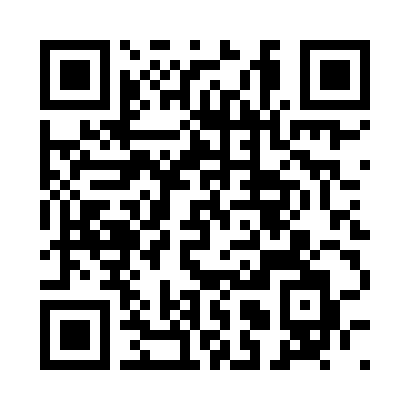

In [10]:
admin_access = User("admin-%s" % access_service.service_type(), identity_url=access_service.canonical_url())
(login_url, qrcode) = admin_access.request_login()
print(login_url)
qrcode

In [11]:
admin_access.wait_for_login()

True

In [12]:
storage_service = Service(service_url="%s/storage" % url)
print(storage_service)

StorageService(url=http://fn.acquire-aaai.com:8080/t/storage, uid=c91771a1-3132-42f7-aebc-b7fe63119776)


http://fn.acquire-aaai.com:8080/t/storage/s?id=4bb71060


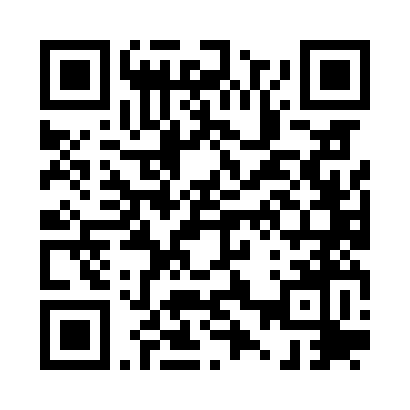

In [13]:
admin_storage = User("admin-%s" % storage_service.service_type(), identity_url=storage_service.canonical_url())
(login_url, qrcode) = admin_storage.request_login()
print(login_url)
qrcode

In [14]:
admin_storage.wait_for_login()

True

In [15]:
resource = "trust_service %s" % identity_service.uid()
public_cert = identity_service.public_certificate().to_data()
args = {"service_url": identity_service.canonical_url(),
            "authorisation": Authorisation(user=admin_accounting,
                                           resource=resource).to_data(),
            "public_certificate": public_cert}

In [16]:
response = accounting_service.call_function(
                    function="admin/trust_service", args=args)
print(response)

{'status': 0, 'message': 'Success. Now trusting IdentityService(url=http://fn.acquire-aaai.com:8080/t/identity, uid=fdac3ab5-3527-46f8-8432-c7ec8f586fc6)', 'args': {'service_url': 'http://fn.acquire-aaai.com:8080/t/identity', 'authorisation': {'user_uid': '9443658c-a52b-4d2a-9c4d-4ecb36fa3f47', 'session_uid': '0946b5ef-c2d3-4ec6-84ff-a91987235b87', 'identity_url': 'http://fn.acquire-aaai.com:8080/t/accounting', 'identity_uid': 'ee005e09-c312-44be-bcce-08ac158a1234', 'auth_datetime': '2019-02-20T15:41:02.408731', 'signature': 'eGv4dAXHLMpNz/36UpP560xnE6QmUWkyJ/rS7Kyhx3f93WQXqlWqtB0IZkSe+2AEItHSR3EfTPzZziQZGbQm+oWeMcq6DWMOfq28jUovpytKcFjWVk8boY3uKbX+pR0Oh7Hf0XjsvSmQrwpWiABLTiojbPCzp2x0fZ0lebn6L4rni6hoTnmFVZufYJyhnPnohOa33c12kRqO1x9nZ5p+b9WUVkTz50sW3z38fEIFboV6R2JgQdIwhMqx1EBdGhfT6HmEohSW+8AkN50iQYkn2SSmNqRTEO2nQ9ieN3UX2+Z85Ge2Oh3PtaxCyYpiPcqXCuARiQmWBPaR2rBxXCzilQ=='}, 'public_certificate': {'bytes': 'LS0tLS1CRUdJTiBQVUJMSUMgS0VZLS0tLS0KTUlJQklqQU5CZ2txaGtpRzl3MEJBUUVGQUFPQ0FROEFNSUlCQ2d

In [17]:
resource = "trust_service %s" % identity_service.uid()
public_cert = identity_service.public_certificate().to_data()
args = {"service_url": identity_service.canonical_url(),
            "authorisation": Authorisation(user=admin_access,
                                           resource=resource).to_data(),
            "public_certificate": public_cert}

In [18]:
response = access_service.call_function(
                    function="admin/trust_service", args=args)
print(response)

{'status': 0, 'message': 'Success. Now trusting IdentityService(url=http://fn.acquire-aaai.com:8080/t/identity, uid=fdac3ab5-3527-46f8-8432-c7ec8f586fc6)', 'args': {'service_url': 'http://fn.acquire-aaai.com:8080/t/identity', 'authorisation': {'user_uid': '1b00addb-71b8-4b3f-bfb2-de7c39ab07af', 'session_uid': '34a3ae07-6b9c-4f55-97ef-fd77e6c98d71', 'identity_url': 'http://fn.acquire-aaai.com:8080/t/access', 'identity_uid': 'ab495477-5781-45f3-baef-1a17f62d4c56', 'auth_datetime': '2019-02-20T15:41:41.812803', 'signature': 'IuH42REHnrT7CEScfQzRXfTHjSMGNAC8kb87c7EuayUAeTWsTl4Ud9IVSnoFyZzJUi2/tAY9aNsq0VDSD98gtOXMiZDArg1bwkF//VoxDh427y6nAUAAV1YNkI1BbnDWGsw8tgqA5+FEDUSTGgj1CyBo11kJhM8KmhcAvwoxOeC9MFnOQmgSeRg3PBYfNW9docZnbrSlfb9gAeiX71FcdpCFMObLbi+0XJI/ZFsBkDyS3VoTrQhTN45xfAn6NZekKnlyEWyWE2ipbVVZXrqEWXFV8v1UuMpPlONMmxOdjg+y1i9S6FegH0wgFTuFD/icdoLrBg6FIJJU9TfpKwbU/g=='}, 'public_certificate': {'bytes': 'LS0tLS1CRUdJTiBQVUJMSUMgS0VZLS0tLS0KTUlJQklqQU5CZ2txaGtpRzl3MEJBUUVGQUFPQ0FROEFNSUlCQ2dLQ0F

In [19]:
resource = "trust_service %s" % identity_service.uid()
public_cert = identity_service.public_certificate().to_data()
args = {"service_url": identity_service.canonical_url(),
            "authorisation": Authorisation(user=admin_storage,
                                           resource=resource).to_data(),
            "public_certificate": public_cert}

In [20]:
response = storage_service.call_function(
                    function="admin/trust_service", args=args)
print(response)

{'status': 0, 'message': 'Success. Now trusting IdentityService(url=http://fn.acquire-aaai.com:8080/t/identity, uid=fdac3ab5-3527-46f8-8432-c7ec8f586fc6)', 'args': {'service_url': 'http://fn.acquire-aaai.com:8080/t/identity', 'authorisation': {'user_uid': 'a94f4e55-96e1-462a-a4db-487cc6d600f2', 'session_uid': '4bb71060-764b-476c-9c5f-25970e7b76ac', 'identity_url': 'http://fn.acquire-aaai.com:8080/t/storage', 'identity_uid': 'c91771a1-3132-42f7-aebc-b7fe63119776', 'auth_datetime': '2019-02-20T15:41:56.276142', 'signature': 'CoQNqVVpqsBI7Q5IsWK7yF8BvG1zo84Pk2dXjNi76vk55UBWba2WBLWb388DZhZpmKg0Qqy/YxEbu/01U6O1EKxMOCq+ewhelLvbIo/wvO7rnh9BYsDyU+REhV7MOpR0LO7X+0mab6wDdzUbxmdATMADtUwCYyq0S/F9AHSNsWE6uNkdoA9bXOKXsW8FIx0RzVdb2MTQQig4RKq9lAF+0QRbAzL3De1mdxytheXhAak4HUFUVmX2rZjZr4DMW/ImEBXloAZWJFvgGIVrbH2FCAED8/F6+WAscGtQZF/fY5zDEkOHOVt2BIXBcV5LxmGN3hIjwt1d8HNXZeRiuUGlBQ=='}, 'public_certificate': {'bytes': 'LS0tLS1CRUdJTiBQVUJMSUMgS0VZLS0tLS0KTUlJQklqQU5CZ2txaGtpRzl3MEJBUUVGQUFPQ0FROEFNSUlCQ2dLQ0

In [21]:
resource = "trust_service %s" % access_service.uid()
public_cert = access_service.public_certificate().to_data()
args = {"service_url": access_service.canonical_url(),
            "authorisation": Authorisation(user=admin_accounting,
                                           resource=resource).to_data(),
            "public_certificate": public_cert}

In [22]:
response = accounting_service.call_function(
                    function="admin/trust_service", args=args)
print(response)

{'status': 0, 'message': 'Success. Now trusting AccessService(url=http://fn.acquire-aaai.com:8080/t/access, uid=ab495477-5781-45f3-baef-1a17f62d4c56)', 'args': {'service_url': 'http://fn.acquire-aaai.com:8080/t/access', 'authorisation': {'user_uid': '9443658c-a52b-4d2a-9c4d-4ecb36fa3f47', 'session_uid': '0946b5ef-c2d3-4ec6-84ff-a91987235b87', 'identity_url': 'http://fn.acquire-aaai.com:8080/t/accounting', 'identity_uid': 'ee005e09-c312-44be-bcce-08ac158a1234', 'auth_datetime': '2019-02-20T15:42:08.527663', 'signature': 'oVlnv+DYsrpcJjwhjG26jl9lK6EPdJTkWyIyyd8fyvGLtvcIr9uzm21i52o08io2Mz34sy8EeC00z/UaTo7CDR70E9wHdQUXHwPRhsnReK3XW8+21V0XT01PnJDzMUTotj2zSc/9Kfd1niQkN2LIPXpU+p7PMVJUmWcEBqIryMgYgyBPfxYxI0evVmJUDLzafMk1Nq4zm45nTfVCm6zimfZwxg6noU940cX8BceJmQ3gxkCx6S1QwxKGG6aKZ0UR0q3iXXhlfaEXKkBydz22MFJuF0gH6haPwRyv2FbXP3Kb5Hu6eDbpiC7tCD9jBTJajfflUp+WPMcL5Im71Xd4zw=='}, 'public_certificate': {'bytes': 'LS0tLS1CRUdJTiBQVUJMSUMgS0VZLS0tLS0KTUlJQklqQU5CZ2txaGtpRzl3MEJBUUVGQUFPQ0FROEFNSUlCQ2dLQ0FRR

In [23]:
resource = "trust_service %s" % accounting_service.uid()
public_cert = accounting_service.public_certificate().to_data()
args = {"service_url": accounting_service.canonical_url(),
            "authorisation": Authorisation(user=admin_access,
                                           resource=resource).to_data(),
            "public_certificate": public_cert}

In [24]:
response = access_service.call_function(
                    function="admin/trust_service", args=args)
print(response)

{'status': 0, 'message': 'Success. Now trusting AccountingService(url=http://fn.acquire-aaai.com:8080/t/accounting, uid=ee005e09-c312-44be-bcce-08ac158a1234)', 'args': {'service_url': 'http://fn.acquire-aaai.com:8080/t/accounting', 'authorisation': {'user_uid': '1b00addb-71b8-4b3f-bfb2-de7c39ab07af', 'session_uid': '34a3ae07-6b9c-4f55-97ef-fd77e6c98d71', 'identity_url': 'http://fn.acquire-aaai.com:8080/t/access', 'identity_uid': 'ab495477-5781-45f3-baef-1a17f62d4c56', 'auth_datetime': '2019-02-20T15:42:19.290643', 'signature': 'W50RViR9q2bUO8NHleHsMsfS3/x7+MWRNo2nZex0OmF4aAvtCheUoNpe/r8DKpI4p8l4STTYigHHBQkY6pttY/3QaoTG3xSt+F83K9GELnnXkRzPoJvZvUVuhP1Hk87d62VHmPlIYXKNfPYn5iBlRKDQmBL8zQmJP0qAilJ29Z1StikavqcaCEIKeGvdrIzAcyU/vVPsxcpLE6IvCDxIa5y1IjiasMp0wct9mdMk9eZsKyWQB09QBUh0sPvmDfWRUh0K/QeF1BSw6QVTafkPvPzr/F6L39HTtcLAY3WwUgxeONC6xjavmYiU7Dg45q45sbGn8ZGbHjIKJtaYMAs+pw=='}, 'public_certificate': {'bytes': 'LS0tLS1CRUdJTiBQVUJMSUMgS0VZLS0tLS0KTUlJQklqQU5CZ2txaGtpRzl3MEJBUUVGQUFPQ0FROEFNSUlCQ

In [25]:
resource = "trust_accounting_service %s" % accounting_service.uid()
public_cert = accounting_service.public_certificate().to_data()
args = {"service_url": accounting_service.canonical_url(),
            "authorisation": Authorisation(user=admin_access,
                                           resource=resource).to_data(),
            "public_certificate": public_cert}

In [26]:
response = access_service.call_function(
                    function="admin/trust_accounting_service", args=args)
print(response)

{'status': 0, 'message': 'Success. Now trusting AccessService(url=http://fn.acquire-aaai.com:8080/t/access, uid=ab495477-5781-45f3-baef-1a17f62d4c56)', 'args': {'service_url': 'http://fn.acquire-aaai.com:8080/t/accounting', 'authorisation': {'user_uid': '1b00addb-71b8-4b3f-bfb2-de7c39ab07af', 'session_uid': '34a3ae07-6b9c-4f55-97ef-fd77e6c98d71', 'identity_url': 'http://fn.acquire-aaai.com:8080/t/access', 'identity_uid': 'ab495477-5781-45f3-baef-1a17f62d4c56', 'auth_datetime': '2019-02-20T15:42:24.098040', 'signature': 'hyKaBeLVNO52KKJUXmcxQ2WPmAjaRD37xCFvhysYZirh29IXHhFuXghZzxFg8FWfrBRpQJsZzYkTg3QF8xh33K/a3yOeilW2QJRKSUI/XLV3/GLXHQRp9e5b9ugj1QknOp79Pyf14OcLBSZoxpLRgREsRur/73NnwkfWobQIkFW0/nthTOxyQoY4BM6ViE5L4sHl3f2f1/4dIlaDb3uY9VxDcScYQbPd8UcDdZ6PWoXPjoUtdXMH0IcjlJV4pKwcxqknYB9EmJz2mVwRQy+zo+yNBDJkpar23iezkWx0XGBuUCFsvXYtZBANMlB+aoutEFkO43QyFWYMdQzkT4cYCA=='}, 'public_certificate': {'bytes': 'LS0tLS1CRUdJTiBQVUJMSUMgS0VZLS0tLS0KTUlJQklqQU5CZ2txaGtpRzl3MEJBUUVGQUFPQ0FROEFNSUlCQ2dLQ0FRR

In [27]:
admin_access.logout()
admin_accounting.logout()
admin_identity.logout()
admin_storage.logout()

{'status': 0, 'message': 'Successfully logged out'}